# TODO

* AUTOMATE ALL THE PROCESS FOR A GIVEN NUMBER X OF THRESHOLDS (IN PRSICE IT'S EASIRE BECAUSE IT COMES EVERYTHING ON ONE TABLE, SO FOR LASSO, MAKE FIRST A SINGLE TABLE AND THEY REPEAT THE WHOLE PROCESS)
* UPDATE THE PHENOTYPES => THE FACT OF RUNNING IT SEVERAL TIMES SHOULDN'T GIVE A PROBLEM!

In [201]:
library(dplyr)
library(ggplot2)
library(data.table)
library(ROCR)
library(pROC)
library(pscl)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [168]:
setwd('/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/')

### Phenotypes

In [178]:
phenos <- read.table("data/final_phenotypes.txt", header=T)
head(phenos)
dim(phenos)

,IID,IID.1,IBDvsCON
,<int>,<int>,<int>
1,9263,9263,1
2,9535,9535,2
3,5924,5924,2
4,2762,2762,2
5,9323,9323,1
6,7670,7670,2


[1] 4110    3

### Target cases

In [170]:
target_prsice_prs <- read.table("output_data/a_2_julia_prsice/target_data/IBD_GSA_fin.all_score", header = T)
head(target_prsice_prs)
dim(target_prsice_prs)

,FID,IID,Pt_5e.08,Pt_1e.05,Pt_0.01,Pt_0.05,Pt_0.1,Pt_0.5,Pt_1
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9263,9263,-0.02966395,-0.01908398,0.001936105,0.003392011,0.003035900,0.001873690,0.001425078
2,9535,9535,-0.03179319,-0.01943360,0.001937256,0.003335473,0.003029277,0.001871383,0.001421913
3,5924,5924,-0.02201262,-0.01717565,0.001874207,0.003380829,0.003030656,0.001879337,0.001427784
4,2762,2762,-0.02544136,-0.01781447,0.001921837,0.003332093,0.003002018,0.001839074,0.001398646
5,9323,9323,-0.02790532,-0.01925211,0.001808639,0.003273063,0.002963838,0.001834197,0.001394021
6,7670,7670,-0.03039452,-0.02082099,0.001802246,0.003234912,0.002952817,0.001842905,0.001400251


[1] 3864    9

In [171]:
target_prsice_prs_pheno <- merge(target_prsice_prs, phenos, by = "IID")
head(target_prsice_prs_pheno)
dim(target_prsice_prs_pheno)

,IID,FID,Pt_5e.08,Pt_1e.05,Pt_0.01,Pt_0.05,Pt_0.1,Pt_0.5,Pt_1,IID.1,IBDvsCON
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,1,-0.03166229,-0.02142323,0.001843741,0.003297842,0.002991321,0.001855687,0.001412658,1,2
2,2,2,-0.02766262,-0.01827174,0.001946175,0.003367056,0.003067745,0.001884347,0.001431937,2,2
3,3,3,-0.02407093,-0.01695398,0.001857481,0.003281909,0.002991849,0.001853512,0.001410655,3,2
4,5,5,-0.02722841,-0.01864913,0.002081904,0.003424561,0.003078933,0.001885277,0.001432813,5,2
5,7,7,-0.02779718,-0.01836615,0.001941422,0.003371951,0.003046175,0.001889901,0.001436709,7,2
6,8,8,-0.02822326,-0.01864416,0.001920985,0.003371647,0.003033148,0.001873807,0.001423825,8,2


[1] 3864   11

In [172]:
# Check that we didn't miss any individual when merging
# head(sort(prsice_prs[,"IID"]))
# head(prsice_prs_pheno[,"IID"])

print("TARGET: Everything OK? (T/F)")
setequal(sort(target_prsice_prs[,"IID"]), target_prsice_prs_pheno[,"IID"])

[1] "TARGET: Everything OK? (T/F)"


[1] TRUE

In [173]:
target.prs.prsice.1 <- target_prsice_prs_pheno %>% select(1, 2, 11, 3) #Pt_5e.08
target.prs.prsice.2 <- target_prsice_prs_pheno %>% select(1, 2, 11, 4) #Pt_1e.05
target.prs.prsice.3 <- target_prsice_prs_pheno %>% select(1, 2, 11, 5) #Pt_0.01
target.prs.prsice.4 <- target_prsice_prs_pheno %>% select(1, 2, 11, 6) #Pt_0.05
target.prs.prsice.5 <- target_prsice_prs_pheno %>% select(1, 2, 11, 7) #Pt_0.1
target.prs.prsice.6 <- target_prsice_prs_pheno %>% select(1, 2, 11, 8) #Pt_0.5
target.prs.prsice.7 <- target_prsice_prs_pheno %>% select(1, 2, 11, 9) #Pt_1

head(target.prs.prsice.1)
head(target.prs.prsice.2)
head(target.prs.prsice.3)
head(target.prs.prsice.4)
head(target.prs.prsice.5)
head(target.prs.prsice.6)
head(target.prs.prsice.7)


,IID,FID,IBDvsCON,Pt_5e.08
,<int>,<int>,<int>,<dbl>
1,1,1,2,-0.03166229
2,2,2,2,-0.02766262
3,3,3,2,-0.02407093
4,5,5,2,-0.02722841
5,7,7,2,-0.02779718
6,8,8,2,-0.02822326


,IID,FID,IBDvsCON,Pt_1e.05
,<int>,<int>,<int>,<dbl>
1,1,1,2,-0.02142323
2,2,2,2,-0.01827174
3,3,3,2,-0.01695398
4,5,5,2,-0.01864913
5,7,7,2,-0.01836615
6,8,8,2,-0.01864416


,IID,FID,IBDvsCON,Pt_0.01
,<int>,<int>,<int>,<dbl>
1,1,1,2,0.001843741
2,2,2,2,0.001946175
3,3,3,2,0.001857481
4,5,5,2,0.002081904
5,7,7,2,0.001941422
6,8,8,2,0.001920985


,IID,FID,IBDvsCON,Pt_0.05
,<int>,<int>,<int>,<dbl>
1,1,1,2,0.003297842
2,2,2,2,0.003367056
3,3,3,2,0.003281909
4,5,5,2,0.003424561
5,7,7,2,0.003371951
6,8,8,2,0.003371647


,IID,FID,IBDvsCON,Pt_0.1
,<int>,<int>,<int>,<dbl>
1,1,1,2,0.002991321
2,2,2,2,0.003067745
3,3,3,2,0.002991849
4,5,5,2,0.003078933
5,7,7,2,0.003046175
6,8,8,2,0.003033148


,IID,FID,IBDvsCON,Pt_0.5
,<int>,<int>,<int>,<dbl>
1,1,1,2,0.001855687
2,2,2,2,0.001884347
3,3,3,2,0.001853512
4,5,5,2,0.001885277
5,7,7,2,0.001889901
6,8,8,2,0.001873807


,IID,FID,IBDvsCON,Pt_1
,<int>,<int>,<int>,<dbl>
1,1,1,2,0.001412658
2,2,2,2,0.001431937
3,3,3,2,0.001410655
4,5,5,2,0.001432813
5,7,7,2,0.001436709
6,8,8,2,0.001423825


### External cases

In [174]:
external_prsice_prs <- read.table("output_data/a_2_julia_prsice/external_data/1000G_EUR_fin.all_score", header = T)
head(external_prsice_prs)
dim(external_prsice_prs)

# We don't have phenotypes for these ones, so I'll skip that step ==> think in how to automatize this part.

,FID,IID,Pt_5e.08,Pt_1e.05,Pt_0.01,Pt_0.05,Pt_0.1,Pt_0.5,Pt_1
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA12718,NA12718,-0.03219318,-0.01971711,0.0007996112,0.002191060,0.002329467,0.001494331,0.001148876
2,NA12748,NA12748,-0.03933706,-0.02462283,0.0006566221,0.002143471,0.002301170,0.001456161,0.001119134
3,NA12775,NA12775,-0.03513934,-0.02098842,0.0005396554,0.002088187,0.002248490,0.001453734,0.001115701
4,NA12777,NA12777,-0.03815105,-0.02320026,0.0004889141,0.002058480,0.002218231,0.001419500,0.001088887
5,NA12778,NA12778,-0.04062430,-0.02283414,0.0004812726,0.002100387,0.002225720,0.001440661,0.001107014
6,NA12827,NA12827,-0.02434598,-0.01573414,0.0008175667,0.002273169,0.002396682,0.001516319,0.001159924


[1] 503   9

In [175]:
external.prs.prsice.1 <- external_prsice_prs %>% select(1, 2, 3) #Pt_5e.08
external.prs.prsice.2 <- external_prsice_prs %>% select(1, 2, 4) #Pt_1e.05
external.prs.prsice.3 <- external_prsice_prs %>% select(1, 2, 5) #Pt_0.01
external.prs.prsice.4 <- external_prsice_prs %>% select(1, 2, 6) #Pt_0.05
external.prs.prsice.5 <- external_prsice_prs %>% select(1, 2, 7) #Pt_0.1
external.prs.prsice.6 <- external_prsice_prs %>% select(1, 2, 8) #Pt_0.5
external.prs.prsice.7 <- external_prsice_prs %>% select(1, 2, 9) #Pt_1

head(external.prs.prsice.1)
head(external.prs.prsice.2)
head(external.prs.prsice.3)
head(external.prs.prsice.4)
head(external.prs.prsice.5)
head(external.prs.prsice.6)
head(external.prs.prsice.7)


,FID,IID,Pt_5e.08
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,-0.03219318
2,NA12748,NA12748,-0.03933706
3,NA12775,NA12775,-0.03513934
4,NA12777,NA12777,-0.03815105
5,NA12778,NA12778,-0.04062430
6,NA12827,NA12827,-0.02434598


,FID,IID,Pt_1e.05
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,-0.01971711
2,NA12748,NA12748,-0.02462283
3,NA12775,NA12775,-0.02098842
4,NA12777,NA12777,-0.02320026
5,NA12778,NA12778,-0.02283414
6,NA12827,NA12827,-0.01573414


,FID,IID,Pt_0.01
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,0.0007996112
2,NA12748,NA12748,0.0006566221
3,NA12775,NA12775,0.0005396554
4,NA12777,NA12777,0.0004889141
5,NA12778,NA12778,0.0004812726
6,NA12827,NA12827,0.0008175667


,FID,IID,Pt_0.05
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,0.002191060
2,NA12748,NA12748,0.002143471
3,NA12775,NA12775,0.002088187
4,NA12777,NA12777,0.002058480
5,NA12778,NA12778,0.002100387
6,NA12827,NA12827,0.002273169


,FID,IID,Pt_0.1
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,0.002329467
2,NA12748,NA12748,0.002301170
3,NA12775,NA12775,0.002248490
4,NA12777,NA12777,0.002218231
5,NA12778,NA12778,0.002225720
6,NA12827,NA12827,0.002396682


,FID,IID,Pt_0.5
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,0.001494331
2,NA12748,NA12748,0.001456161
3,NA12775,NA12775,0.001453734
4,NA12777,NA12777,0.001419500
5,NA12778,NA12778,0.001440661
6,NA12827,NA12827,0.001516319


,FID,IID,Pt_1
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,0.001148876
2,NA12748,NA12748,0.001119134
3,NA12775,NA12775,0.001115701
4,NA12777,NA12777,0.001088887
5,NA12778,NA12778,0.001107014
6,NA12827,NA12827,0.001159924


#### Extract the mean and the standard deviation of the external scores

* Individual tables for each of the thresholds
* Common table: ```target_prsice_prs_pheno``` and ```external_prsice_prs```

In [162]:
# Means and sd separatelly per threshold =======================
ext_mean.prsice.1 <- mean(external.prs.prsice.1[,3])
ext_sd.prsice.1 <- sd(external.prs.prsice.1[,3])
ext_mean.prsice.2 <- mean(external.prs.prsice.2[,3])
ext_sd.prsice.2 <- sd(external.prs.prsice.2[,3])
ext_mean.prsice.3 <- mean(external.prs.prsice.3[,3])
ext_sd.prsice.3 <- sd(external.prs.prsice.3[,3])
ext_mean.prsice.4 <- mean(external.prs.prsice.4[,3])
ext_sd.prsice.4 <- sd(external.prs.prsice.4[,3])
ext_mean.prsice.5 <- mean(external.prs.prsice.5[,3])
ext_sd.prsice.5 <- sd(external.prs.prsice.5[,3])
ext_mean.prsice.6 <- mean(external.prs.prsice.6[,3])
ext_sd.prsice.6 <- sd(external.prs.prsice.6[,3])
ext_mean.prsice.7 <- mean(external.prs.prsice.7[,3])
ext_sd.prsice.7 <- sd(external.prs.prsice.7[,3])

# All together ==================================================
external_prsice_scores <- external_prsice_prs[,3:9]

external_mean.prsice <- as.data.frame(colMeans(external_prsice_scores))
external_sd.prsice <- as.data.frame(apply(external_prsice_scores, 2, sd))

colnames(external_mean.prsice) <- c("mean_external_PRSice")
external_mean.prsice
colnames(external_sd.prsice) <- c("sd_external_PRSice")
external_sd.prsice

,mean_external_PRSice
,<dbl>
Pt_5e.08,-0.0343493796
Pt_1e.05,-0.0203094236
Pt_0.01,0.0007119132
Pt_0.05,0.0021941775
Pt_0.1,0.0023189724
Pt_0.5,0.0014765907
Pt_1,0.0011328417


,sd_external_PRSice
,<dbl>
Pt_5e.08,3.010260e-03
Pt_1e.05,1.487261e-03
Pt_0.01,1.232520e-04
Pt_0.05,6.712335e-05
Pt_0.1,4.993132e-05
Pt_0.5,2.402665e-05
Pt_1,1.774274e-05


In [182]:
# head(target.prs.prsice.1)
# target.prs.prsice.1[,4]

In [183]:
# standardize target
# separatelly per threshold =======================
target.prs.prsice.1$std_prs <- (target.prs.prsice.1[,4] - ext_mean.prsice.1) / ext_sd.prsice.1
target.prs.prsice.2$std_prs <- (target.prs.prsice.2[,4] - ext_mean.prsice.2) / ext_sd.prsice.2
target.prs.prsice.3$std_prs <- (target.prs.prsice.3[,4] - ext_mean.prsice.3) / ext_sd.prsice.3
target.prs.prsice.4$std_prs <- (target.prs.prsice.4[,4] - ext_mean.prsice.4) / ext_sd.prsice.4
target.prs.prsice.5$std_prs <- (target.prs.prsice.5[,4] - ext_mean.prsice.5) / ext_sd.prsice.5
target.prs.prsice.6$std_prs <- (target.prs.prsice.6[,4] - ext_mean.prsice.6) / ext_sd.prsice.6
target.prs.prsice.7$std_prs <- (target.prs.prsice.7[,4] - ext_mean.prsice.7) / ext_sd.prsice.7

# All together ==================================================

In [184]:
print('EXTERNAL PRSs for the 1st threshold')
head(external.prs.prsice.1)
print('EXTERNAL PRSs MEAN for the 1st threshold')
ext_mean.prsice.1
print('EXTERNAL PRSs STD for the 1st threshold')
ext_sd.prsice.1
print('TARGET PRSs after STANDARDZATION for the 1st threshold')
head(target.prs.prsice.1)

[1] "EXTERNAL PRSs for the 1st threshold"


,FID,IID,Pt_5e.08
,<chr>,<chr>,<dbl>
1,NA12718,NA12718,-0.03219318
2,NA12748,NA12748,-0.03933706
3,NA12775,NA12775,-0.03513934
4,NA12777,NA12777,-0.03815105
5,NA12778,NA12778,-0.04062430
6,NA12827,NA12827,-0.02434598


[1] "EXTERNAL PRSs MEAN for the 1st threshold"


[1] -0.03434938

[1] "EXTERNAL PRSs STD for the 1st threshold"


[1] 0.00301026

[1] "TARGET PRSs after STANDARDZATION for the 1st threshold"


,IID,FID,IBDvsCON,Pt_5e.08,std_prs
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,1,2,-0.03166229,0.892643
2,2,2,2,-0.02766262,2.221322
3,3,3,2,-0.02407093,3.414473
4,5,5,2,-0.02722841,2.365568
5,7,7,2,-0.02779718,2.176624
6,8,8,2,-0.02822326,2.035082


In [185]:
# update the phenotype

target.prs.prsice.update.1 <- target.prs.prsice.1
target.prs.prsice.update.2 <- target.prs.prsice.2
target.prs.prsice.update.3 <- target.prs.prsice.3
target.prs.prsice.update.4 <- target.prs.prsice.4
target.prs.prsice.update.5 <- target.prs.prsice.5
target.prs.prsice.update.6 <- target.prs.prsice.6
target.prs.prsice.update.7 <- target.prs.prsice.7

target.prs.prsice.update.1$IBDvsCON <- target.prs.prsice.update.1$IBDvsCON - 1
target.prs.prsice.update.2$IBDvsCON <- target.prs.prsice.update.2$IBDvsCON - 1
target.prs.prsice.update.3$IBDvsCON <- target.prs.prsice.update.3$IBDvsCON - 1
target.prs.prsice.update.4$IBDvsCON <- target.prs.prsice.update.4$IBDvsCON - 1
target.prs.prsice.update.5$IBDvsCON <- target.prs.prsice.update.5$IBDvsCON - 1
target.prs.prsice.update.6$IBDvsCON <- target.prs.prsice.update.6$IBDvsCON - 1
target.prs.prsice.update.7$IBDvsCON <- target.prs.prsice.update.7$IBDvsCON - 1


head(target.prs.prsice.update.1)

target.prs.prsice.update.1[,3]
unique(target.prs.prsice.update.1$std_prs)

,IID,FID,IBDvsCON,Pt_5e.08,std_prs
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1,1,-0.03166229,0.892643
2,2,2,1,-0.02766262,2.221322
3,3,3,1,-0.02407093,3.414473
4,5,5,1,-0.02722841,2.365568
5,7,7,1,-0.02779718,2.176624
6,8,8,1,-0.02822326,2.035082


[1] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
  [75] 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 [112] 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [371] 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 [556] 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 [704] 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0
 [741] 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
[1000] 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
[1037] 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1
[1074] 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
[1111] 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1
[1148] 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
[1185] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
[1222] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0
[1259] 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
[1296] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1333] 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
[1370] 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
[1407] 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1444] 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
[1481] 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
[1518] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1
[1592] 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
[1629] 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1
[1666] 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
[1703] 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
[1740] 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
[1777] 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1
[1814] 1 0 1 1 0 0 0 1 0 1 1 0 0 1

[1]  0.892643030  2.221321753  3.414472826  2.365568219  2.176624112
   [6]  2.035081599  2.885716292  1.560017412  3.220672693  2.081269145
  [11]  0.215170316  2.395918459 -0.181203944  1.472001713  1.083904778
  [16]  1.941547638  1.114806864  0.937451060  0.968849748  2.034695320
  [21]  1.481548232  2.698262123  2.029728904  2.600313592  2.008097481
  [26]  0.431264076  2.242953210  1.859933080  2.297362937  1.958874881
  [31] -0.194778787  1.036999852  1.558637864  2.799576776  2.692412794
  [36]  1.932221830  3.743579864  1.301322941  2.276007403  3.988037323
  [41]  3.093422369  1.442644742  2.328927192  5.733342182  3.643699971
  [46]  3.880818196  1.869038142  1.885537650  1.125346686  1.643839288
  [51]  4.080798727  3.199041236  1.642294205  3.018208921  3.933517240
  [56]  3.855710262  2.481064705  1.165409013  3.429923853  1.509139374
  [61]  2.150357374  1.945300038  2.488017661  1.886586098  3.724542004
  [66]  3.131056666  1.987073014  1.592078336  2.393931886  2.081103611
  [71]  2.420253836  1.998054293  2.052795088  1.371735508  0.061211764
  [76]  1.154151810  1.214410867  1.431001261  0.803744417  3.205828657
  [81]  2.454963501  0.648737417  1.001021028  2.618082293  1.621711196
  [86]  0.433857639  0.558348832  1.978961222  0.364272809  2.083421252
  [91]  1.480223861  2.562955186  1.957384943  2.338859990  1.953577364
  [96]  1.963068739  2.654502574  2.181756062  2.075419848  1.003669769
 [101]  0.687861651  1.548649888  1.851876466  0.682233034  1.971014964
 [106]  2.528742189  2.492377085  1.380675036  2.781090696  1.346186116
 [111]  3.856427609  2.619461842  2.433497578 -0.250181784  2.262266993
 [116]  0.753914826  0.879675212  1.688261039  1.848455166  2.394318165
 [121]  1.685667442  2.614053969  1.619669445  2.150633263  3.799424351
 [126]  0.863561983  1.627450169  1.339950541  2.257245433  3.094525995
 [131]  1.880019421  3.409396055  2.688825960  2.406678993  0.702816043
 [136]  1.790403394  3.139334025  2.487631382  1.570060600  2.291016973
 [141]  2.386206373 -0.305750315  2.957398052  4.427729676  2.864967749
 [146]  0.515637764  1.578889772  1.160277063  3.132822494  1.187040470
 [151]  1.274118078  3.086027924  1.921130195  1.553726659  1.797742662
 [156]  3.649328555  2.050367092  2.291292863  3.790871068  3.957742261
 [161]  2.390565798  3.820448784  1.300550383  3.180224087  2.553298311
 [166]  2.222866869  3.522078232  1.358105487  1.363678893  2.474442818
 [171]  2.096002824  2.694785646  0.963662621  2.531115041  1.404734523
 [176]  1.811648572  2.296038566  2.647935898  0.864720820  2.294162349
 [181]  1.517306344  4.651935228  3.097616227  2.448176079  2.191688893
 [186]  0.494668509  1.599417570  1.909597103  3.581233630  2.874128022
 [191]  1.841115899  1.342985561  0.388994464  1.526742507  1.026404852
 [196]  1.495454175  2.600865405  0.946997579  1.567301502  2.495136183
 [201]  2.201676869  3.603306544  1.409369837  1.900547219  2.498833406
 [206]  0.552389146  1.642846018  1.764191834  0.574627628  1.481051597
 [211]  0.523528844  1.638210703  2.292506877  1.316718790  1.424269051
 [216]  2.882184637  2.090760519  2.840025382  3.116212630  2.950941731
 [221]  3.294065102  2.196379385  2.305861008  2.123759501  2.157144762
 [226]  1.031757547  2.175023818  1.293818140  2.778828233  2.056050854
 [231]  2.743787500  1.523321208  2.659965625  4.007792597 -0.099589354
 [236]  1.481603410  1.921295763  1.141570271  0.987280651  0.313394737
 [241]  1.837529065  1.775338647  2.172926923  2.808571482  2.736613800
 [246]  0.829955977  0.797729553  1.400099208  2.289858136  2.319380640
 [251]  3.050821657  2.420419403  1.681142516  1.500751659  3.851350837
 [256]  1.360478339  1.777104475  2.385930483  2.774634375  2.847806073
 [261]  1.336860309  2.213154783  1.883495899  1.614151250  1.829582807
 [266]  2.274848566  3.160855093  3.027810651  0.402183028  2.697434387
 [271]  1.709726929  1.140466612  1.691792694  1.851159086  1.264019712
 [276]  2.526590082  0.691282951  2.5051793

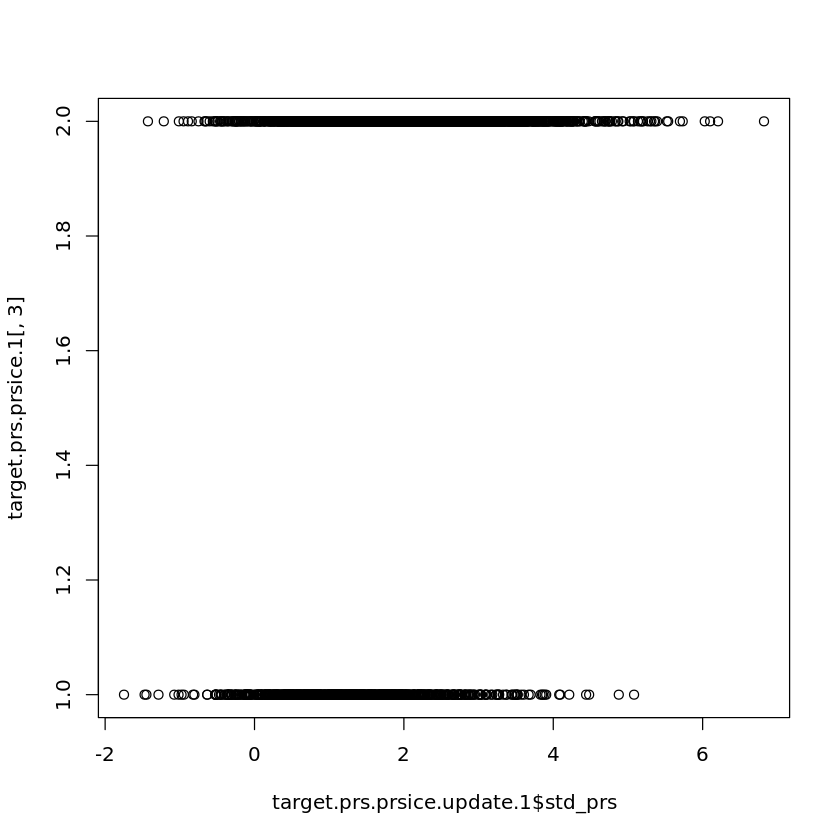

In [186]:
plot(target.prs.prsice.update.1$std_prs, target.prs.prsice.1[,3])

In [187]:
# construct logistic regression to see which is the best of the four
log_model.prsice.1 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.1, family = binomial(link = "logit"))
log_model.prsice.2 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.2, family = binomial(link = "logit"))
log_model.prsice.3 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.3, family = binomial(link = "logit"))
log_model.prsice.4 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.4, family = binomial(link = "logit"))
log_model.prsice.5 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.5, family = binomial(link = "logit"))
log_model.prsice.6 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.6, family = binomial(link = "logit"))
log_model.prsice.7 <- glm(IBDvsCON ~ std_prs, data = target.prs.prsice.update.7, family = binomial(link = "logit"))

In [190]:
#make a list of the explained variance
explained_var.prsice <- c(with(summary(log_model.prsice.1), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.2), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.3), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.4), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.5), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.6), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.7), 1 - deviance/null.deviance))
explained_var.prsice

[1] 0.07709964 0.09088405 0.06195991 0.05057297 0.04362507 0.04117497 0.04037205

In [192]:
#obtain the highest explained variance 
best_prs.prsice <- which.max(explained_var.prsice)

#make a list of the prs datasets
targets.prsice <- list(target.prs.prsice.update.1, target.prs.prsice.update.2, 
                       target.prs.prsice.update.3, target.prs.prsice.update.4,
                       target.prs.prsice.update.5, target.prs.prsice.update.6,
                       target.prs.prsice.update.7)

In [193]:
#obtain the best prs by indexing from which model
#had the best explained variance
best_target.prsice <- as.data.frame(targets.prsice[best_prs.prsice])
best_target.prsice <- best_target.prsice[complete.cases(best_target.prsice), ]

In [194]:
#recode phenotype into a factor
best_target.prsice$IBDvsCON <- as.factor(best_target.prsice$IBDvsCON)

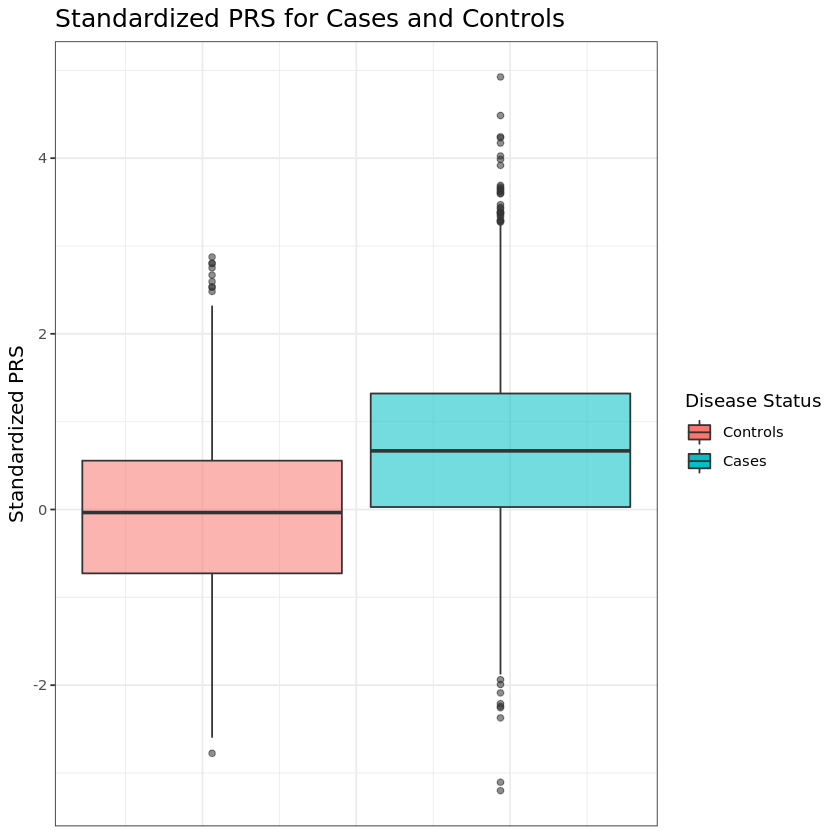

In [195]:
#make boxplot
ggplot(best_target.prsice, aes(y = std_prs, group = IBDvsCON, fill = IBDvsCON, alpha = 0.5)) +
labs(title = "Standardized PRS for Cases and Controls", y = "Standardized PRS", fill = 'Disease Status')+
geom_boxplot() + guides (alpha = "none") + theme_bw() + 
theme(plot.title = element_text(size=15), axis.title.y =  element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank()) + scale_fill_discrete(labels = c("Controls","Cases"))

In [198]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

In [199]:
#need to write table for best prs
write.table(best_target.prsice, "005_comparison/best_prs_prsice.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file '005_comparison/best_prs_prsice.txt': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


Do bootstrapping on the ROC estimate so we can have a confidence interval for the AUC metric.

In [202]:
#run the ROC
prsice.roc <- roc(best_target.prsice$IBDvsCON, best_target.prsice$std_prs, smooth = F)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [203]:
#do the bootstrapping 
prsice.roc.ci <- ci.auc(prsice.roc, method = "bootstrap", boot.n = 1000, boot.stratified = TRUE)

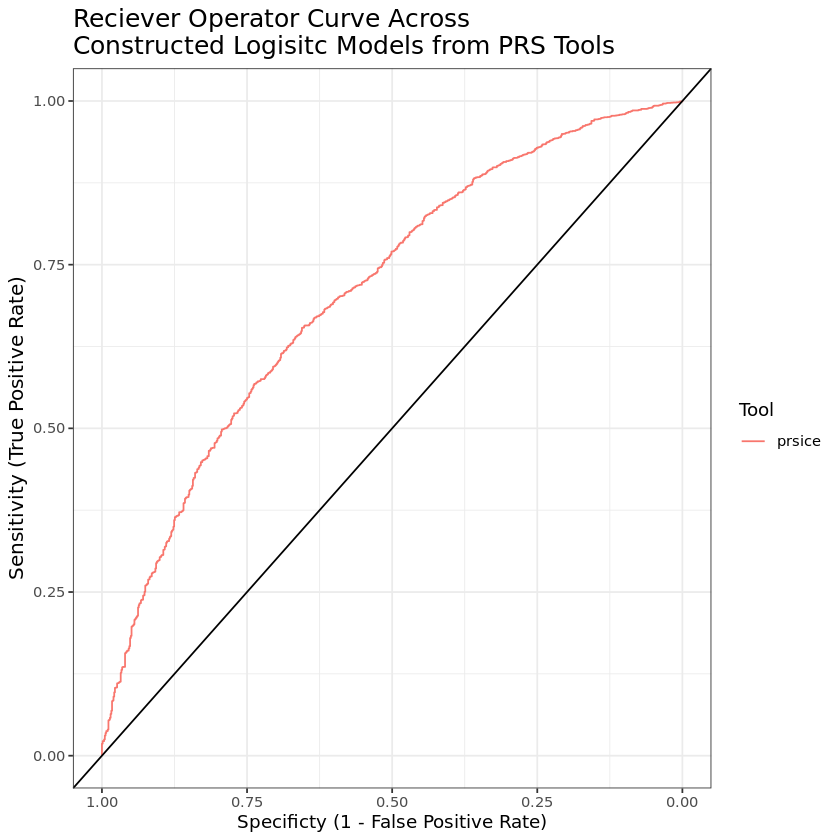

In [204]:
#plot the roc curve
#to add more curves just add the roc output to the list
#example: `list(lasso=lasso.roc, PLINK = plink.roc)
ggroc(list(prsice=prsice.roc)) + 
labs(title = "Reciever Operator Curve Across\nConstructed Logisitc Models from PRS Tools ",y = "Sensitivity (True Positive Rate)", x = "Specificty (1 - False Positive Rate)", col = "Tool") +
theme_bw() + theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12)) +
geom_abline(intercept = 1, slope = 1)


In [205]:
#write a function to allow for rounding
scaleFUN <- function(x) sprintf("%.3f", x)

In [206]:
#create a dataframe for the auc metric 
performance_metrics_auc <- data.frame(matrix(ncol = 4, nrow = 0))
#enter the lassoSum estimates
prsice_perform_auc <- c("PRSice",prsice.roc.ci[1],prsice.roc.ci[2],prsice.roc.ci[3])
#enter a test estimate for plotting
test_auc <- c('test', 0.6734, 0.73241, 0.7876)
#combine with the empty dataframe
performance_metrics_auc <- rbind(performance_metrics_auc, prsice_perform_auc, test_auc)
#rename the columns of the dataframe
colnames(performance_metrics_auc) <- c("tool", "lower_95", "estimate", "upper_95")

In [208]:
#make the dataframe columns numeric
performance_metrics_auc$lower_95 <- as.numeric(performance_metrics_auc$lower_95)
performance_metrics_auc$estimate <- as.numeric(performance_metrics_auc$estimate)
performance_metrics_auc$upper_95 <- as.numeric(performance_metrics_auc$upper_95)
head(performance_metrics_auc)

,tool,lower_95,estimate,upper_95
,<chr>,<dbl>,<dbl>,<dbl>
1,PRSice,0.6879494,0.7079179,0.7274945
2,test,0.6734000,0.7324100,0.7876000


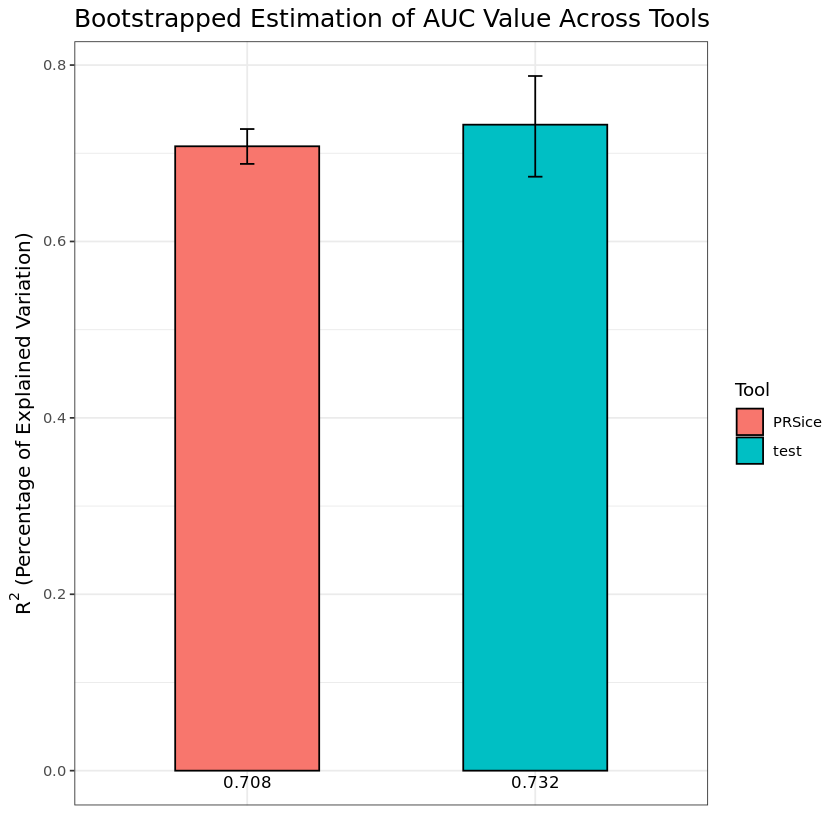

In [210]:
#make the r-sqr plot
ggplot(performance_metrics_auc, aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black") + labs(title = bquote("Bootstrapped Estimation of AUC Value Across Tools"), 
       y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.02) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())+
geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 